# Exploración Inicial del Dataset de Películas (IMDB)

En este notebook realizamos la exploración inicial del dataset `movie_metadata.csv`.

El objetivo es:
- Entender la estructura del dataset.
- Evaluar calidad, tipos de datos y problemas.
- Estudiar variables clave para el análisis futuro:
  - `gross` (ganancias)
  - `country`
  - `content_rating` (clasificación por edades)
  - `genres` (géneros de la película)
- Detectar valores nulos, duplicados y anomalías.
- Describir las transformaciones que serán necesarias en la fase de limpieza.




In [2]:
#Importamos las librerías necesarias para analisis de datos
import pandas as pd
import numpy as np
#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

movies = pd.read_csv("../data/movie_metadata.csv")
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [15]:
movies.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [16]:
# Exploratory Data Analysis (EDA) on Movie Dataset
# Identificamos la estructura del dataset:
 #- Dimensiciones del dataset.
movies.shape

(5043, 28)

In [17]:
#- Ver columnas y tipos de datos.

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

1. Estructura general del dataset

El dataset contiene 5043 películas y 28 columnas, combinando variables numéricas, categóricas y textuales.  
Las columnas necesarias para el análisis planteado (`gross`, `country`, `genres`, `content_rating`) están presentes y con información suficiente.  

La variedad de columnas adicionales (likes, keywords, duración, etc.) no son críticas para el objetivo principal, por lo que se centrarán los esfuerzos en las columnas relevantes.


In [7]:
# Revisamos los tipos de datos de forma resumida
movies.dtypes


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [6]:
# Estadisticas descriptivas básicas
movies.describe()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
# Estadísticas descriptivas para columnas categóricas (tipo 'object')
movies.describe(include="object")


,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5029,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,46,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,King Kong,Steve Coogan,based on novel,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [19]:
#Valores nulos en el dataset
movies.isna().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_facebook_likes      104
director_name                104
num_critic_for_reviews        50
actor_3_facebook_likes        23
actor_3_name                  23
num_user_for_reviews          21
color                         19
duration                      15
language                      14
actor_2_facebook_likes        13
actor_2_name                  13
facenumber_in_poster          13
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
genres                         0
movie_title                    0
cast_total_facebook_likes      0
movie_imdb_link                0
num_voted_users                0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

2. Valores faltantes

El análisis de valores nulos muestra que existen vacíos importantes:

- gross: 884 nulos (~17.5% del total)
- content_rating: 303 nulos
- country: 5 nulos
- title_year: ~100 nulos
- Otras variables (likes, keywords, aspect_ratio) presentan vacíos, pero no afectan al análisis planteado (igualmente se tratarán muchas de ellas ).

# Implicación:
Para el análisis final será necesario eliminar o completar registros sin:
- `gross` (ganancias)
- `content_rating` (clasificación)
- `country` (país)

Estos valores faltantes afectan directamente al objetivo, por lo que su tratamiento es prioritario.


In [20]:
# Duplicados
movies.duplicated().sum()

np.int64(45)

3. Duplicados

El dataset contiene 45 filas duplicadas.  
Estos duplicados deben eliminarse en la fase de limpieza para evitar distorsiones en los cálculos de ingresos medios por país o por clasificación.


4. Selección de variables numéricas para análisis de outliers

El dataset contiene numerosas columnas numéricas, pero no todas son relevantes para un análisis exploratorio inicial.  
Para detectar outliers nos centramos únicamente en las variables que:

- tienen un significado claro dentro del dominio cinematográfico,  
- presentan una distribución continua,  
- y cuyos valores extremos pueden aportar información útil.

Por este motivo analizamos:

- `gross`: ingresos brutos → outliers revelan grandes éxitos económicos.
- `budget`: presupuesto → outliers identifican producciones de alto coste.
- `duration`: duración en minutos → permite detectar películas extremadamente largas o cortas.
- `imdb_score`: puntuación IMDb → aunque está acotada, aporta información de calidad.

Otras columnas numéricas (como recuentos de reseñas, número de votos, `aspect_ratio` o likes en Facebook) no se incluyen en este bloque porque sus posibles outliers no tienen un significado claro, no afectan a la calidad del dataset o son artefactos del uso de plataformas externas.  
Estas columnas se analizarán posteriormente solo si resultan necesarias para correlaciones o análisis específicos.


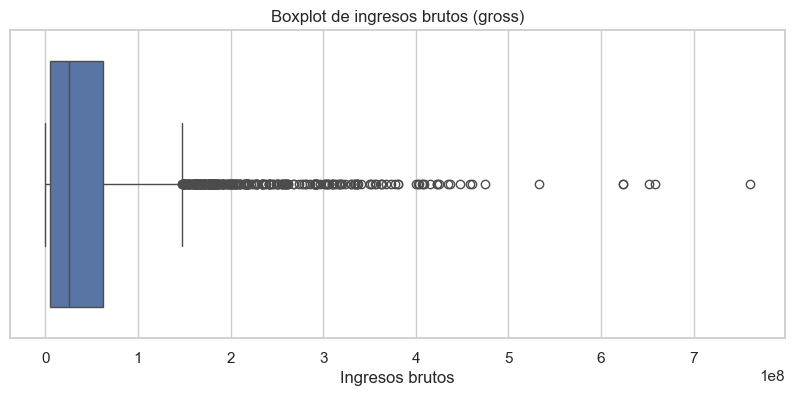

In [3]:
plt.figure(figsize=(10,4))
sns.boxplot(x=movies["gross"])
plt.title("Boxplot de ingresos brutos (gross)")
plt.xlabel("Ingresos brutos")
plt.show()


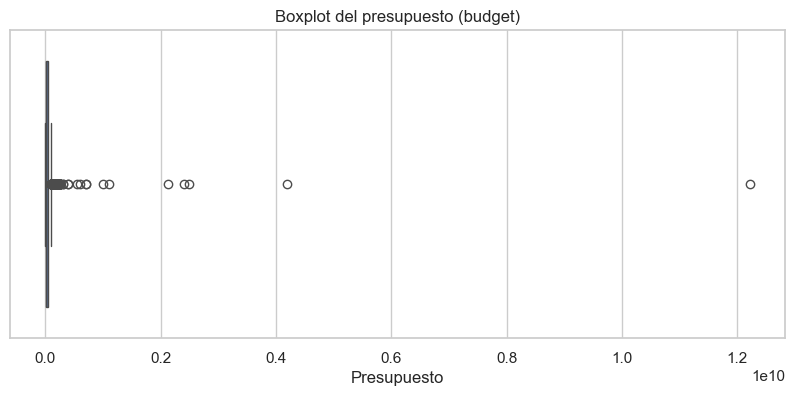

In [4]:
plt.figure(figsize=(10,4))
sns.boxplot(x=movies["budget"])
plt.title("Boxplot del presupuesto (budget)")
plt.xlabel("Presupuesto")
plt.show()


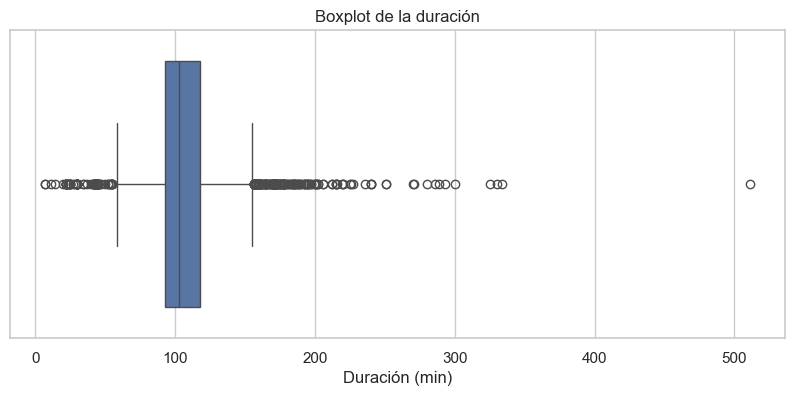

In [5]:
plt.figure(figsize=(10,4))
sns.boxplot(x=movies["duration"])
plt.title("Boxplot de la duración")
plt.xlabel("Duración (min)")
plt.show()


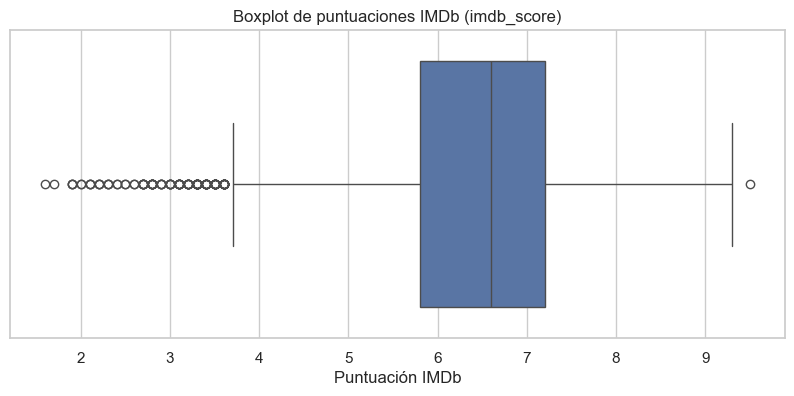

In [6]:
plt.figure(figsize=(10,4))
sns.boxplot(x=movies["imdb_score"])
plt.title("Boxplot de puntuaciones IMDb (imdb_score)")
plt.xlabel("Puntuación IMDb")
plt.show()


In [7]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

numeric_cols = ["gross", "budget", "duration", "imdb_score"]

for col in numeric_cols:
    n_outliers = count_outliers(movies[col].dropna())
    print(f"{col}: {n_outliers} outliers detectados")


gross: 306 outliers detectados
budget: 318 outliers detectados
duration: 241 outliers detectados
imdb_score: 120 outliers detectados


Tras obtener los outliers podemos hacer las siguientes afirmaciones:

- El número elevado de outliers en gross se debe a la distribución típica del mercado cinematográfico, en el que un pequeño número de películas concentra la mayor parte de los ingresos.
Estos valores son reales y no representan errores, por lo que no deben eliminarse.

- Los outliers en budget corresponden a superproducciones reales del mercado cinematográfico.
Estos valores no deben eliminarse.
Sin embargo, se revisarán los presupuestos extremadamente bajos o igual a 0, que probablemente correspondan a valores faltantes o errores de registro.

- Los outliers en duration reflejan tanto películas muy cortas (probablemente cortometrajes) como películas inusualmente largas.
Lo que nos lleva a considerar el clasificar estas péliculas como `Cortometrajes`, `Peliculas_nomales` y `Peliculas_de_larga_duración`.
- Los outliers detectados en imdb_score corresponden a películas con puntuaciones muy bajas o muy altas.
Dado que la escala de IMDb es de 1 a 10, estos valores son reales y no deben eliminarse.

In [13]:
# Detección de incoherencias en el dataset.
# Filas con presupuesto negativo o cero
movies[movies["budget"] <= 0][["movie_title", "budget"]]; movies[movies["budget"] <= 0].head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes


In [14]:
# Filas con ingresos negativos o cero
movies[movies["gross"] <= 0][["movie_title", "gross"]]; movies[movies["gross"] <= 0].head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes


5. Presupuestos o ingresos imposibles

Se analizan valores de `budget` y `gross` menores o iguales a cero.  
Concluyendo en que no existen valores anomalos.



In [6]:
# Años imposibles o fuera de rango lógico
movies[(movies["title_year"] < 1900) | (movies["title_year"] > 2025)][["movie_title", "title_year"]].head()


,movie_title,title_year


5. 2.  Años fuera de rango

Se evalúa si `title_year` contiene valores fuera de un rango lógico para películas comerciales (1900–2025).

Tampoco hay incoherencias.


In [22]:
# Análisis de las variables de interés.
# Análisis de content_rating.

movies["content_rating"].value_counts(dropna=False)


content_rating
R            2118
PG-13        1461
PG            701
NaN           303
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: count, dtype: int64

5. 3. Análisis de la variable `content_rating`

Los valores más frecuentes son:

- **R**: 2118 películas  
- **PG-13**: 1461  
- **PG**: 701  
- **G**: 112  

Sin embargo, existen categorías problemáticas:

- “Not Rated”  
- “Unrated”  
- “Approved”, “Passed”, “GP”, “M”, “TV-X”, “TV-G”, etc.
- 303 valores nulos

# Implicación:
Será necesario limpiar y normalizar la clasificación, probablemente reduciéndola a:

- R  
- PG-13  
- PG  
- G  
- Otros / No clasificado


In [24]:
# Análisis de "genres".
movies["genres"].head()


0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
4                        Documentary
Name: genres, dtype: object

In [ ]:
# Nos quedamos con el primer género de cada película para simplificar el análisis.
movies["genres"].str.split("|").str[0].value_counts().head(20)


genres
Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Music             1
Game-Show         1
Film-Noir         1
Name: count, dtype: int64

5. 4. Análisis de la variable `genres`

Al observar las primeras filas (`head()`), se ve que:

- Muchos registros contienen varios géneros concatenados con el carácter `|`, por ejemplo:
  - `Action|Adventure|Fantasy|Sci-Fi`
  - `Action|Adventure|Thriller`
  - `Action|Thriller`
- Otros registros tienen un único género, como `Documentary`.

# Implicación:

Tal y como está, la columna `genres` es difícil de analizar directamente porque mezcla múltiples géneros en un solo campo y existen muchas combinaciones posibles.  
Para simplificar el análisis y poder estudiar el efecto del género sobre las ganancias, será necesario:

- Separar la cadena por `|`.
- Definir una nueva variable, por ejemplo:
  - `main_genre` = primer género de la lista (el que aparece antes del primer `|`).

Esta transformación se realizará en el notebook de limpieza.


In [27]:
#Análisis variable "country"
movies["country"].value_counts(dropna=False).head(20)


country
USA             3807
UK               448
France           154
Canada           126
Germany           97
Australia         55
India             34
Spain             33
China             30
Japan             23
Italy             23
Hong Kong         17
Mexico            17
New Zealand       15
South Korea       14
Ireland           12
Russia            11
Denmark           11
South Africa       8
Norway             8
Name: count, dtype: int64

5. 5. Análisis de la variable `country`

Los principales países representados son:

- USA: 3807 películas  
- UK: 448  
- France: 154  
- Canada: 126  
- Germany: 97  
- Otros países tienen menos de 60 películas.

# Conclusión:
El análisis por país estará fuertemente influenciado por USA, que domina con más del 75% del dataset.  
Para países con muy pocos registros (<20) los resultados pueden no ser estadísticamente representativos.


In [7]:
# Análisis variable "language"
movies["language"].value_counts(dropna=False).head(20)

language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
NaN             14
Cantonese       11
Italian         11
Russian         11
Korean           8
Portuguese       8
Danish           5
Swedish          5
Hebrew           5
Arabic           5
Polish           4
Persian          4
Norwegian        4
Name: count, dtype: int64

5. 6. Análisis de la variable `language`:

Observamos una cantidad de valores nulos que no podemos mantener dado que es imposible que una película no tenga idioma.


In [8]:
# Análisis variable "duration"
movies["duration"].describe()


count    5028.000000
mean      107.201074
std        25.197441
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64

In [12]:
def count_short_movies(df, threshold=60):

# Cuenta cuántas películas tienen una duración inferior al tiempo mínimo que he impuesto (por defecto 60 min).
    
    
    return df[df["duration"] < threshold].shape[0]





In [13]:
num_short_movies = count_short_movies(movies)
num_short_movies

82

5. 7. Análisis de la variable duración:

Observamos que hay 82 películas que duran menos de 60 minutos (menos de una hora n puede considerarse una película paar analizar).

Posteriormente agruparemos estos parámetros para estudiarlos por separado.

In [28]:
# Analisis inicial de ingresos (gross)
movies["gross"].describe()

count    4.159000e+03
mean     4.846841e+07
std      6.845299e+07
min      1.620000e+02
25%      5.340988e+06
50%      2.551750e+07
75%      6.230944e+07
max      7.605058e+08
Name: gross, dtype: float64

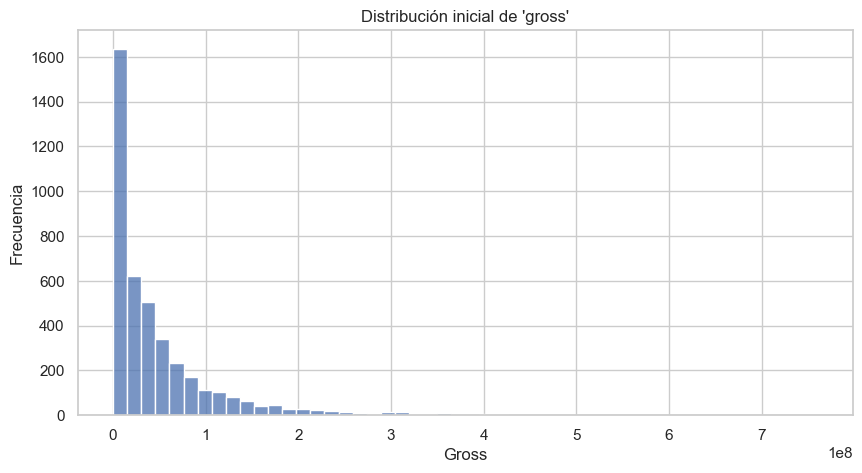

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(movies["gross"], bins=50)
plt.title("Distribución inicial de 'gross'")
plt.xlabel("Gross")
plt.ylabel("Frecuencia")
plt.show()


6. Análisis de la variable `gross` (ganancias)

La variable `gross` presenta la siguiente distribución:

- Media: 48.5M  
- Mediana: 25.5M  
- Mínimo: 162  
- Máximo: 760M  
- Desviación estándar: 68.4M

La distribución es altamente asimétrica, con fuerte sesgo a la derecha y presencia de outliers correspondientes a grandes superproducciones de Hollywood.

# Implicación:
Para comparar ingresos entre grupos (país, género o rating), será recomendable apoyarse en:
- la mediana en lugar de la media,  
- o utilizar visualizaciones como boxplots, más resistentes a valores extremos.


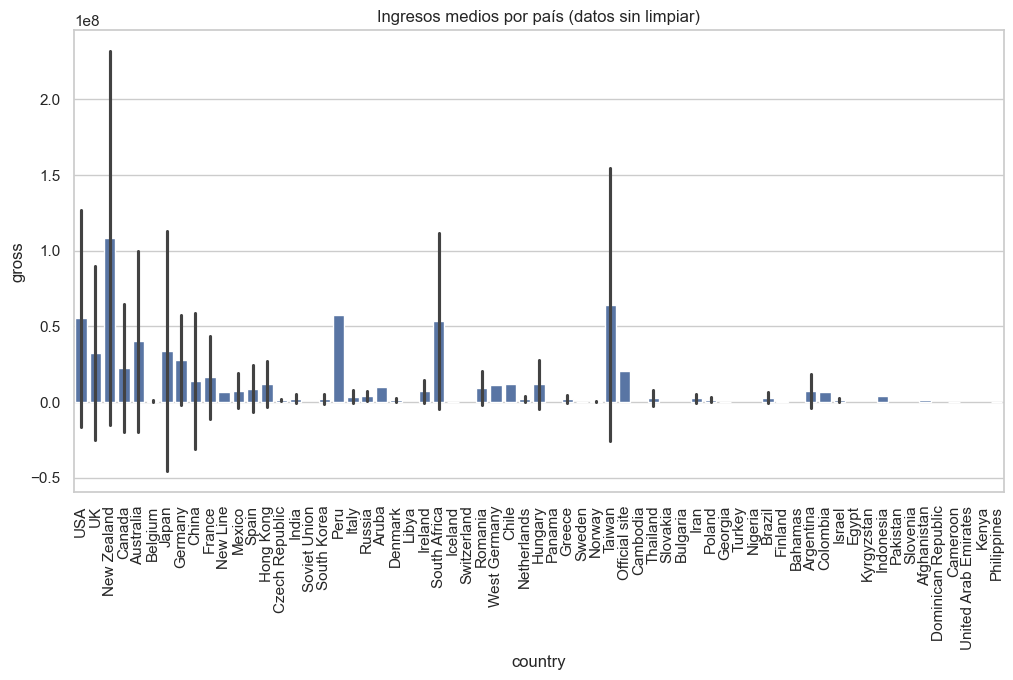

In [30]:
#Relación preliminar: país vs ingresos

plt.figure(figsize=(12,6))
sns.barplot(
    data=movies,
    x="country",
    y="gross",
    errorbar="sd"
)
plt.xticks(rotation=90)
plt.title("Ingresos medios por país (datos sin limpiar)")
plt.show()



7. Relación preliminar entre país y ganancias:

En el gráfico de barras que muestra los ingresos medios por país (sin limpiar los datos) se observa que:

- New Zealand aparece como el país con los ingresos medios más altos.  
  Esto se debe probablemente a que cuenta con muy pocas películas en el dataset y alguna de ellas presenta ingresos excepcionalmente altos, lo que eleva la media.

- Otros países con pocos registros presentan medias muy elevadas o muy bajas debido a esta misma razón (alta sensibilidad a valores atípicos y baja representatividad estadística).

- USA, aunque no aparece como el país con mayor media, sigue siendo el país más representado en el dataset (3807 películas).  
  Esto lo convierte en el caso más estable y estadísticamente fiable a la hora de analizar patrones generales.

# Conclusión:
En esta fase preliminar, las medias por país pueden resultar engañosas porque:
- algunos países tienen muy pocas películas, 
- la variable `gross` presenta outliers muy extremos, 
- y no se ha realizado limpieza ni normalización.

Por ello, en el análisis final será necesario:
- utilizar medianas o boxplots,  
- filtrar o agrupar países con muestras pequeñas,  
- y combinar ingresos con las variables de interés (`content_rating` y `main_genre`) de forma más robusta.


# Conclusión General de la Exploración

El dataset ofrece suficiente información y estructura para abordar el análisis planteado:  estudiar cómo influyen la clasificación por edades y el género en las ganancias según el país.

La exploración ha mostrado que existen problemas de calidad importantes (nulos, ratings no estandarizados, combinaciones complejas de géneros, duplicados), pero todos ellos son abordables mediante limpieza.

Tras aplicar los tratamientos necesarios (normalización de `content_rating`, extracción de `main_genre`, eliminación de duplicados y registros incompletos), el dataset quedará preparado para realizar un análisis comparativo robusto entre países, géneros y clasificaciones de edad.

El EDA confirma que el dataset es adecuado para el objetivo final y que la fase de limpieza será crucial para obtener resultados fiables en el siguiente notebook.
